In [39]:
import cv2
import matplotlib.pyplot as plt
from imutils import face_utils

In [40]:
font = cv2.FONT_HERSHEY_SIMPLEX
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

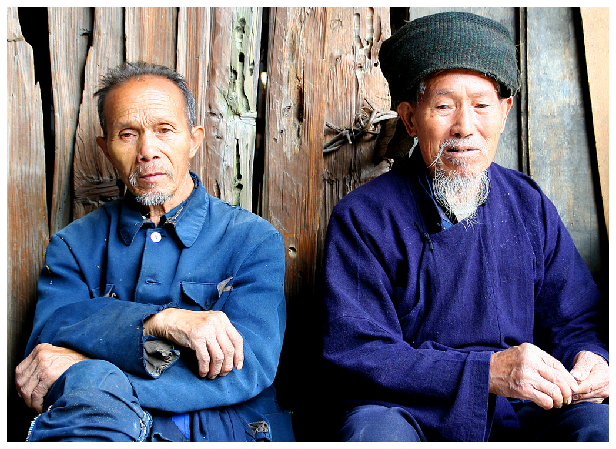

In [41]:
image = cv2.imread('test.jpg', cv2.IMREAD_UNCHANGED)
plt.figure(figsize=(12,8))
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [42]:
faces = faceCascade.detectMultiScale(
image,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 3)

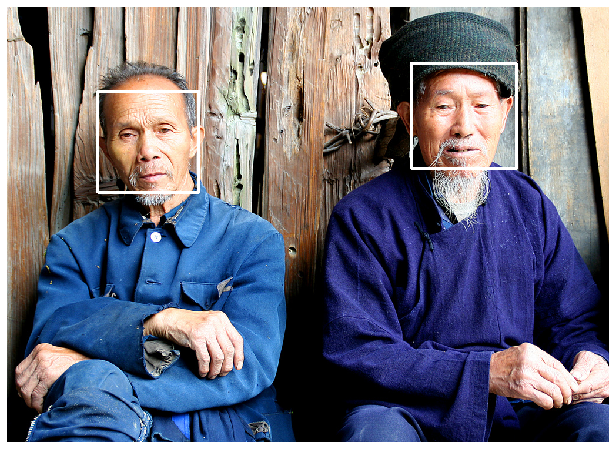

In [43]:
plt.figure(figsize=(12,8))
plt.axis("off")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()